# Section 1: Homework Exercises

This material provides some hands-on experience using the methods learned from the first day's material. They focus on building models using real-world data.

## Exercise: Coal mining disasters model specification

Below is a dataset consisting of a time series of recorded coal mining disasters in the UK from 1851 to 1961. These are just annual counts of disasters, where a disaster is defined as an accident that resulted in the deaths of miners.

Let's plot the data:

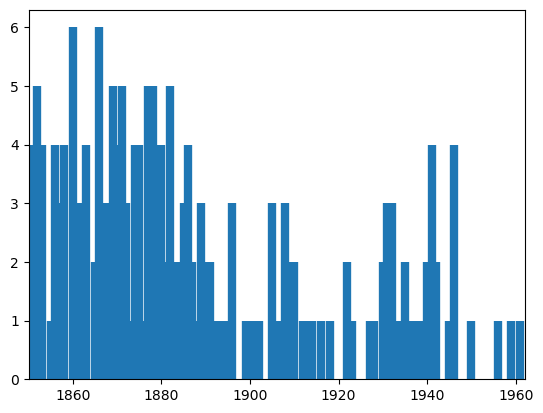

In [2]:
import numpy as np
import matplotlib.pyplot as plt

disasters_array = np.array(
    [4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 
     1, 4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 
     1, 3, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 
     0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 
     1, 2, 4, 2, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 
     1])
years = np.arange(1851, 1962, dtype=int)

fig, ax = plt.subplots()
ax.vlines(years, 0, disasters_array, lw=6)
ax.set_xlim(years.min() - 1, years.max() + 1)
ax.set_ylim(bottom=0);

Notice that we see large annual counts early in the time series and notably larger rates in the later part. We are interested in locating the change point in the series, which perhaps is related to changes in mining safety regulations.

We will be working with this dataset in tomorrow's session, so I wanted to get you thinking about how to model it. The first step in Bayesian inference is writing down a complete probability model. 

Answer the following questions:
- What are the unknown paramters we might be interested in? What sort of priors might we use on them?
- Given that we are dealing with **count data**, what sort of likelihood function might be appropriate?
- Can you code a simple model, either in PyMC or even simulate it from distributions in NumPy or SciPy?

Don't stress over any of this -- we will be going over it in detail tomorrow. This is just to get you thinking about the problem.

In [ ]:
# Write your answer here

## Exercise: Comparing Two Groups with Binary Outcomes

In the first day's material we considered a model comparing two groups with continuous outcomes. For this exercise, we will consider a model comparing two groups with **binary** outcomes.

Binary outcomes are common in clinical research: 

- survival/death
- true/false
- presence/absence
- positive/negative

In practice, binary outcomes are encoded as ones (for event occurrences) and zeros (for non-occurrence). A single binary variable is distributed as a **Bernoulli** random variable:

$$f(x \mid p) = p^{x} (1-p)^{1-x}$$

In terms of inference, we are typically interested in whether $p$ is larger or smaller in one group relative to another.

To demonstrate the comparison of two groups with binary outcomes using Bayesian inference, we will use a sample pediatric dataset. Data on 671 infants with very low (<1600 grams) birth weight from 1981-87 were collected at Duke University Medical Center. Of interest is the relationship between the outcome intra-ventricular hemorrhage (IVH) and predictor such as birth weight, gestational age, presence of pneumothorax and mode of delivery.

In [ ]:
import pandas as pd

vlbw = pd.read_csv('../data/vlbw.csv', index_col=0).dropna(axis=0, subset=['ivh', 'pneumo'])
vlbw.head()

,birth,exit,hospstay,lowph,pltct,race,bwt,gest,inout,twn,...,vent,pneumo,pda,cld,pvh,ivh,ipe,year,sex,dead
5,81.593002,81.598999,2.0,6.969997,54.0,black,925.0,28.0,born at Duke,0.0,...,1.0,1.0,0.0,0.0,definite,definite,NaN,81.594055,female,1
6,81.601997,81.771004,62.0,7.189999,NaN,white,940.0,28.0,born at Duke,0.0,...,1.0,0.0,0.0,0.0,absent,absent,absent,81.602295,female,0
13,81.683998,81.853996,62.0,7.179996,182.0,black,1110.0,28.0,born at Duke,0.0,...,0.0,1.0,0.0,1.0,absent,absent,absent,81.684448,male,0
14,81.689003,81.877998,69.0,7.419998,361.0,white,1180.0,28.0,born at Duke,0.0,...,0.0,0.0,0.0,0.0,absent,absent,absent,81.689880,male,0
16,81.696999,81.952004,93.0,7.239998,255.0,black,770.0,26.0,born at Duke,0.0,...,1.0,0.0,0.0,1.0,absent,absent,absent,81.698120,male,0


To demonstrate binary data analysis, we will try to estimate the difference between the probability of an intra-ventricular hemorrhage for infants with and without a pneumothorax. 

In [ ]:
pd.crosstab(vlbw.ivh, vlbw.pneumo)

pneumo,0.0,1.0
ivh,,
absent,359,73
definite,45,30
possible,6,4


We will create a binary outcome by combining `definite` and `possible` into a single outcome.

In [ ]:
ivh = vlbw.ivh.isin(['definite', 'possible']).astype(int).values
x = vlbw.pneumo.astype(int).values

Specify a PyMC model that evaluates the association of a pneumothorax with the presence of IVH. Use the model in the "Basic Bayes" notebook as a template. No need to actually fit the model, just write it down!

In [ ]:
# Write your answer here